# Download and reading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Convert dataset type

img type is PIL image, need to convert to tensort base on input of torch model.

In [ ]:
%cd /content/drive/MyDrive/Faster_R_CNN_project
!python voc_dataset_format.py

<class 'torch.Tensor'>
torch.Size([3, 300, 400])
{'boxes': tensor([[ 11.,  76., 392., 253.]]), 'labels': tensor([12])}
5717


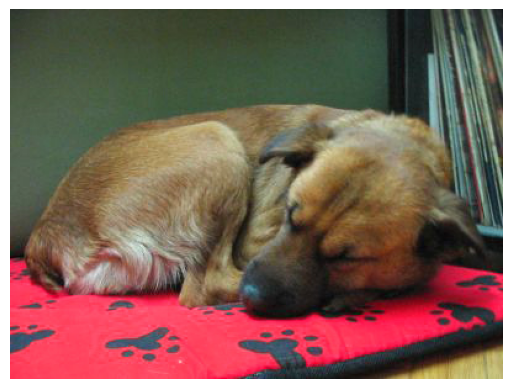

In [ ]:
import voc_dataset_format
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import ToTensor, Compose, RandomAffine, ColorJitter
from torchvision.transforms import ToPILImage
from torchvision.datasets import VOCDetection
from pprint import pprint

transform = ToTensor()
dataset = voc_dataset_format.VOCDataset(
    root = '/content/drive/MyDrive/Faster_R_CNN_project/Dataset',
    year = '2012',
    image_set = 'train',
    download =False,
    transform = transform
  )
image,target = dataset[1000]
pprint(type(image))
pprint(image.shape)
pprint(target)
print(len(dataset))

to_pil = ToPILImage()
img = to_pil(image)
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
print(target['labels'])

tensor([12])


#Data augumentation

In [ ]:
import voc_dataset_format
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import ToPILImage
from torchvision.datasets import VOCDetection
from torchvision.transforms import ToTensor, Compose, RandomAffine, ColorJitter

from pprint import pprint
# apply augumentation
transform = RandomAffine(
          # Data augumentation
          # Chane location
            degrees=(-5, 5),
            translate=(0.15, 0.15),
            scale=(0.85, 1.15),
            shear=10
        )

dataset = voc_dataset_format.VOCDataset(
    root = '/content/drive/MyDrive/Faster_R_CNN_project/Dataset',
    year = '2012',
    image_set = 'train',
    download =False,
    transform = transform
  )
print(len(dataset))
image,target = dataset[1000]
image.show()

5717


In [ ]:
import voc_dataset_format
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import ToPILImage
from torchvision.transforms import ToPILImage
from torchvision.datasets import VOCDetection
from torchvision.transforms import Compose,ToTensor
from pprint import pprint
# apply augumentation
transform = ColorJitter(
          # Data augumentation
          # Chane color
            brightness=0.125,
            contrast=0.5,
            saturation=0.5,
            hue=0.05
        )

dataset = voc_dataset_format.VOCDataset(
    root = '/content/drive/MyDrive/Faster_R_CNN_project/Dataset',
    year = '2012',
    image_set = 'train',
    download =False,
    transform = transform
  )
image,target = dataset[1000]
#image.show()
pprint(type(image))
pprint(image.shape)
pprint(target)
print(len(dataset))

to_pil = ToPILImage()
img = to_pil(image)
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

# Check and change output layer

In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn,FasterRCNN_ResNet50_FPN_Weights
model = fasterrcnn_resnet50_fpn(
        weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT
    )

In [ ]:
print(model)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
print(model.roi_heads.box_predictor)

FastRCNNPredictor(
  (cls_score): Linear(in_features=1024, out_features=91, bias=True)
  (bbox_pred): Linear(in_features=1024, out_features=364, bias=True)
)


## Need to change ouput layer because fasterrcnn_resnet50_fpn trained in poco dataset with 90 class. but our task just have 20 class.

In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
in_channels = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_channels=in_channels, num_classes=21)

In [ ]:
print(model.roi_heads.box_predictor)

FastRCNNPredictor(
  (cls_score): Linear(in_features=1024, out_features=21, bias=True)
  (bbox_pred): Linear(in_features=1024, out_features=84, bias=True)
)


# Training model

In [4]:
!pip install torchmetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 13.3 MB/s eta 0:00:00


In [ ]:
%cd /content/drive/MyDrive/Faster_R_CNN_project
!python test_run.py -b 4 -n 2

/content/drive/MyDrive/Faster_R_CNN_project
2024-09-26 08:23:57.355204: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 08:23:57.385880: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 08:23:57.393159: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-26 08:23:57.411832: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2

i try to build Fast R CNN model using voc dataset
The low mAP score can be attributed to three factors:
1. The model was trained only 2 epochs, which is insufficient for learning complex patterns,
2. A simple model, mobile net was used. this model is optimized for mobile devices and lack the capacity to perform well on more demanding task. initially resnet50 was considered but the forward/backward passes took to long to exeecute
3. the parameter trainable backbone = 0. freezing the backbone weights. only output layer were trained, which is typical in transfer learning. with such few epoch, the model did not have enough time to adapt and improve.
So in the future, when have more stronger computer. i will try more complex model and method to improve performance.
Now is my demo

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/MyDrive/Faster_R_CNN_project
!python training.py -b 4 -n 2

/content/drive/MyDrive/Faster_R_CNN_project
2024-09-26 09:27:20.165019: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 09:27:20.204155: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 09:27:20.216446: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-26 09:27:20.242609: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-2

In [28]:
# Change directory to the project folder
%cd /content/drive/MyDrive/Faster_R_CNN_project
#nothing
# it's bad prediction

# Run the test_new_data.py script with the necessary parameters
!python test_new_data.py --image_path /content/drive/MyDrive/Faster_R_CNN_project/Test_img/chair.jpg --saved_checkpoint /content/drive/MyDrive/Faster_R_CNN_project/checkpoint/best.pt --conf_threshold 0.2

/content/drive/MyDrive/Faster_R_CNN_project
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/content/drive/MyDrive/Faster_R_CNN_project/test_new_data.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default val